In [1]:
conda install matplotlib

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install yfinance


Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import yfinance as yf
import scipy.optimize as sco


In [4]:
# 7 assets that has been chose for running the project 
assets = ['COKE', 'AAPL', 'SPG', 'MSFT', 'V', 'GLD', 'EGO']

In [5]:
#  Defining the date of the assets for 2 years. 
start_date = dt.datetime.today() - dt.timedelta(730)
end_date = dt.datetime.today()


In [6]:
# daily open/close data on the assets for the past 2 years. 

Open =  yf.download(assets, start_date, end_date) ['Open']       
Close =  yf.download(assets, start_date, end_date) ['Close']

[*********************100%***********************]  7 of 7 completed
[*********************100%***********************]  7 of 7 completed


In [7]:
# defining the return mean of the past 2 year. 
portfolio = len(assets)
data = yf.download(assets, start_date, end_date)['Adj Close']
rets = np.log(data / data.shift(1))                                # Returns of the stocks formula 
rets.mean() * 504                                                  #returns mean for the past two years for all the stocks in the assets. 

[*********************100%***********************]  7 of 7 completed


AAPL    0.941606
COKE   -0.018504
EGO     0.910290
GLD     0.285314
MSFT    0.731416
SPG    -0.366226
V       0.333198
dtype: float64

In [8]:
#defining the variance of allthe assets in the portfolio for the past 2 years. 
rets.var() * 504


AAPL    0.289416
COKE    0.365318
EGO     0.943458
GLD     0.056888
MSFT    0.237655
SPG     0.925094
V       0.226374
dtype: float64

In [9]:
#defining the correlation b/w the stock 
rets.corr()

,AAPL,COKE,EGO,GLD,MSFT,SPG,V
AAPL,1.000000,0.351752,0.129922,0.112254,0.792109,0.332343,0.646047
COKE,0.351752,1.000000,0.101345,0.030252,0.373508,0.346364,0.451719
EGO,0.129922,0.101345,1.000000,0.584887,0.123478,0.143663,0.149586
GLD,0.112254,0.030252,0.584887,1.000000,0.109621,-0.028857,0.067553
MSFT,0.792109,0.373508,0.123478,0.109621,1.000000,0.330182,0.751515
SPG,0.332343,0.346364,0.143663,-0.028857,0.330182,1.000000,0.550864
V,0.646047,0.451719,0.149586,0.067553,0.751515,0.550864,1.000000


In [10]:
# monte carlo similulation is to generate random portfolio weight vectors on a larger scale.

In [11]:
# it randomize the portfilio weight to find the best possible way 

In [12]:
# expected portfolio return.
def port_ret(weights):
    return np.sum(rets.mean() * weights) * 504

In [13]:
# expected portfolio Variance.
def port_vol(weights):
    return np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 504, weights)))


In [14]:
prets = []
pvols = []
for p in range (25000):                                     # randomized Monte Carlo simulation of portfolio weights. The number of times it will run the simulation
    weights = np.random.random(portfolio)                   # Random portfolio weights
    weights /= np.sum(weights)                              # That equals up to 1 or 100% 
    prets.append(port_ret(weights)) 
    pvols.append(port_vol(weights))
prets = np.array(prets)
pvols = np.array(pvols)

    

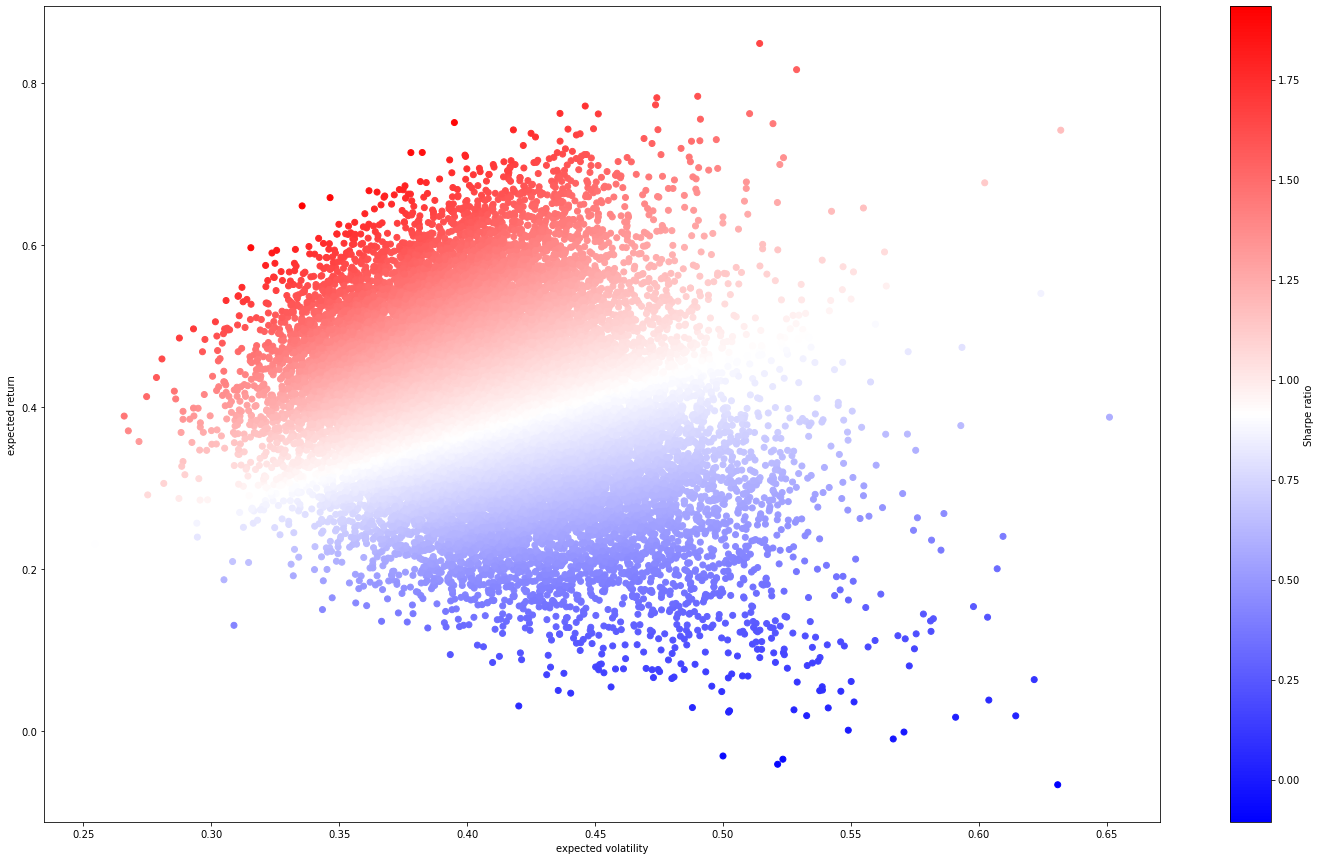

In [15]:
# Expected return and volatility for random portfolio weights (monte carlo simulation)
plt.figure(figsize=(25, 15))
plt.scatter(pvols, prets, c=prets / pvols,marker='o', cmap='bwr')
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio');

In [16]:
# Optimized  portfolio weight. 

In [17]:
 
def min_func_sharpe(weights):
    return -port_ret(weights) / port_vol(weights)

In [18]:
cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

In [19]:
bnds = tuple((0, 1) for x in range(portfolio))

In [20]:
eweights = np.array(portfolio * [1. / portfolio,])
min_func_sharpe(eweights)

-1.0271069902703682

In [21]:
opts = sco.minimize(min_func_sharpe, eweights,                         # defining the optimization function 
                                 method='SLSQP', bounds=bnds,
                                 constraints=cons)
opts

     fun: -2.0309846505018108
     jac: array([-8.75830650e-04,  1.42297828e+00, -2.97737122e-03,  8.43703747e-04,
       -4.64111567e-04,  3.16472781e+00,  8.29147190e-01])
 message: 'Optimization terminated successfully'
    nfev: 61
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([0.3743114 , 0.        , 0.0290347 , 0.52591677, 0.07073713,
       0.        , 0.        ])

In [22]:
opts['x'].round(3) #Optimal porfolio weight for each stock in order to maximize the profit. 

array([0.374, 0.   , 0.029, 0.526, 0.071, 0.   , 0.   ])

In [23]:
# Effecient frontier. 

In [24]:
optv = sco.minimize(port_vol, eweights,                       # minimizing the volatility into a constrain. 
                    method='SLSQP', bounds=bnds,
                    constraints=cons)

In [25]:
# The two binding constraints for the efficient frontier.
cons = ({'type': 'eq', 'fun': lambda x: port_ret(x) - tret}, {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}) 


In [26]:
bnds = tuple((0, 1) for x in weights)

In [27]:
trets = np.linspace(0.05, 0.2, 50)
tvols = []
for tret in trets:
    res = sco.minimize(port_vol, eweights, method='SLSQP',
                                    bounds=bnds, constraints=cons)       # The minimization of portfolio volatility for different target returns.
    tvols.append(res['fun'])
tvols = np.array(tvols)

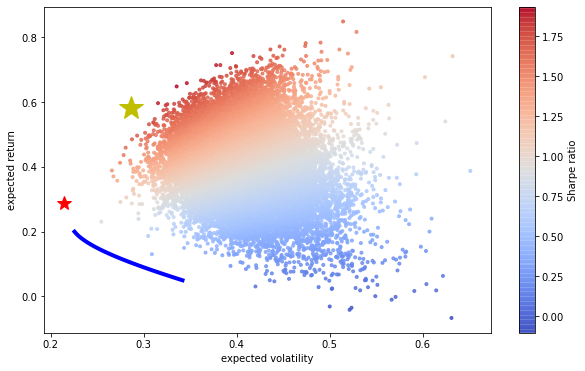

In [28]:
plt.figure(figsize=(25, 10))
plt.scatter(pvols, prets, c=prets / pvols,
    marker='.', alpha=0.8, cmap='coolwarm')
plt.plot(tvols, trets, 'b', lw=4.0)
plt.plot(port_vol(opts['x']), port_ret(opts['x']),
    'y*', markersize=25.0)
plt.plot(port_vol(optv['x']), port_ret(optv['x']),
                      'r*', markersize=15.0)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')
